In [2]:
from tensorflow.keras import datasets, layers, models

# Load up images

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [10]:
x_train, x_test = x_train / 255, x_test / 255

# View some images

In [11]:
import matplotlib.pyplot as plt

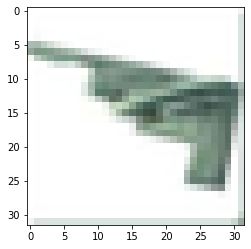

In [12]:
plt.imshow(x_train[12345])

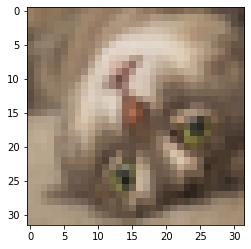

In [13]:
plt.imshow(x_train[2011])

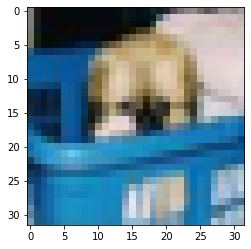

In [14]:
plt.imshow(x_train[1976])

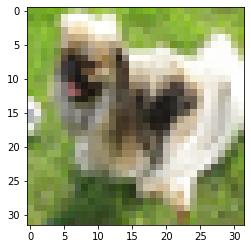

In [15]:
plt.imshow(x_train[1986])

In [16]:
y_train[1986]

array([5], dtype=uint8)

In [19]:
categories = "airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks".split(', ')

In [20]:
categories[5]

'dogs'

In [23]:
categories[y_train[12345][0]]

'airplanes'

# Make the conv net

In [30]:
convnet = models.Sequential()

# conv layer 1
convnet.add(layers.Conv2D(input_shape = (32, 32, 3),
                          filters = 32,
                          kernel_size = 3,
                          activation = 'relu'))
convnet.add(layers.MaxPool2D(pool_size = (2, 2)))

# conv layer 2
convnet.add(layers.Conv2D(filters = 64,
                          kernel_size = 3,
                          activation = 'relu'))
convnet.add(layers.MaxPool2D(pool_size = (2, 2)))

# conv layer 3
convnet.add(layers.Conv2D(filters = 72,
                          kernel_size = 3,
                          activation = 'relu'))

convnet.add(layers.MaxPool2D(pool_size = (2, 2)))

# dense layers
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation = 'relu'))

# output layer
convnet.add(layers.Dense(10, activation = 'softmax'))

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy as scce

In [32]:
convnet.compile(optimizer = 'rmsprop',
                loss = scce(),
                metrics = ['accuracy'])

In [33]:
results = convnet.fit(x = x_train,
            y = y_train,
            epochs = 50,
            validation_data = (x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5989 - accuracy: 0.4197 - val_loss: 1.3473 - val_accuracy: 0.5034
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1879 - accuracy: 0.5821 - val_loss: 1.1255 - val_accuracy: 0.6053
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0142 - accuracy: 0.6448 - val_loss: 1.0092 - val_accuracy: 0.6480
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9093 - accuracy: 0.6816 - val_loss: 0.9283 - val_accuracy: 0.6773
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8310 - accuracy: 0.7106 - val_loss: 0.9839 - val_accuracy: 0.6559
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7673 - accuracy: 0.7342 - val_loss: 1.0149 - val_accuracy: 0.6556
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7183 - accuracy: 0.7502 - val_loss: 0.9989 - val_a

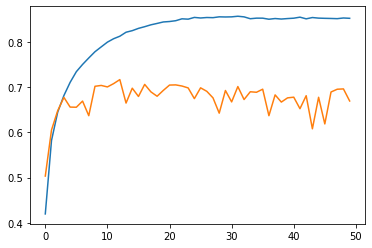

In [36]:
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')